## UNAD

## Anderson Andrey Quitián Pérez 

## Pasos de la Actividad 

In [342]:
#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
#3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
#4 Entrenar el modelo configurando los diferentes hiperparámetros.
#5 Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
#6 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
#7 Interpretar, analizar y documentar los resultados obtenidos. 
#8 Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/. 

1. ## Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [345]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows
import warnings
warnings.filterwarnings('ignore')

#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import pandas as pd
# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [347]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('C:/UNAD_TAREA_5/Titanic-Dataset.csv')

In [348]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(150)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S


In [351]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [352]:
# Obtener informacióin sobrel tipo de datos y el total de valores en cada columna
print(Datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

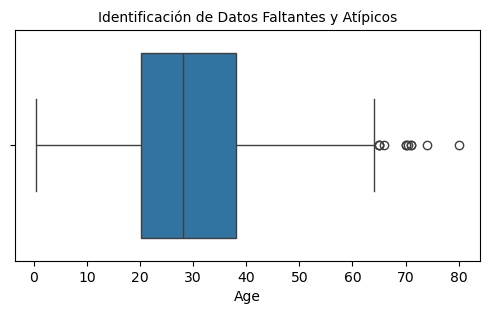

In [355]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

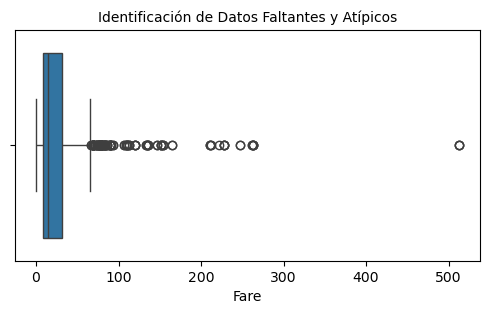

In [356]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

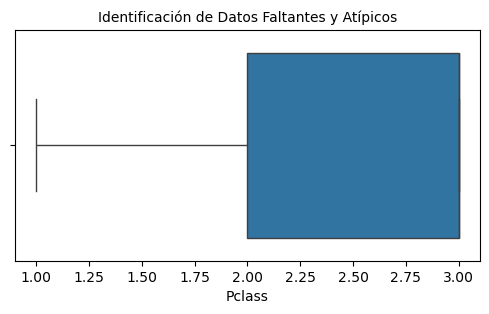

In [357]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

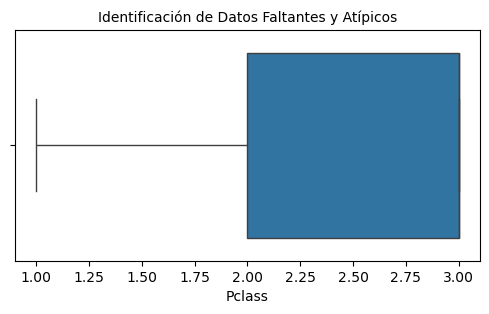

In [359]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

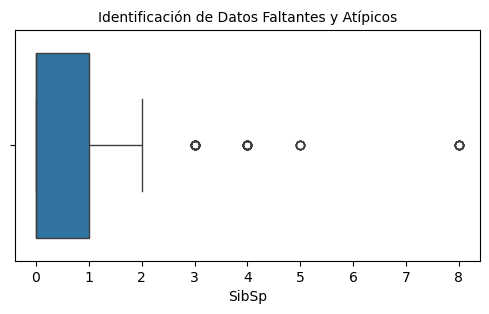

In [361]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

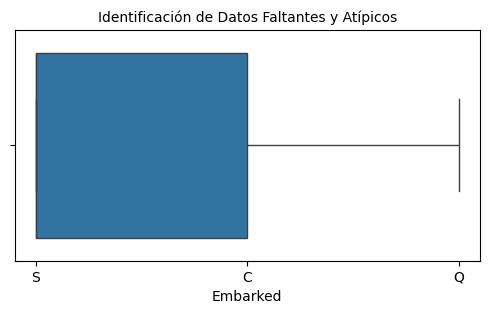

In [363]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Embarked'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [364]:
#Idéntificar columnas con datos faltantes
print(Datos.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'identificacion de datos')

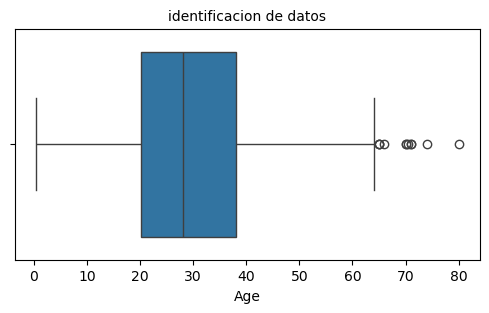

In [366]:
# Idéntificar valores atípicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('identificacion de datos', fontsize=10)

In [367]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=90
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'identificacion de datos')

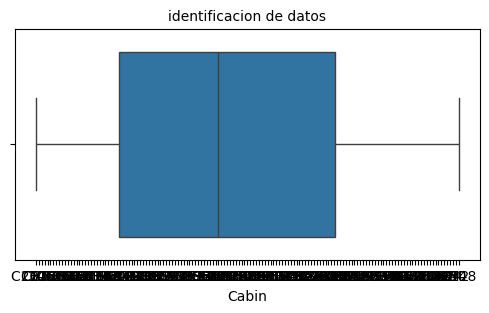

In [369]:
# Idéntificar valores atípicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Cabin'])
plt.title('identificacion de datos', fontsize=10)

Text(0.5, 1.0, 'identificacion de datos')

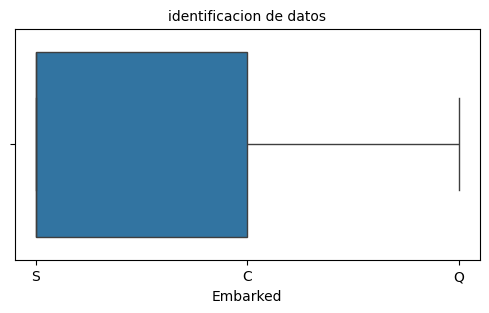

In [372]:
# Idéntificar valores atípicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Embarked'])
plt.title('identificacion de datos', fontsize=10)

In [373]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [374]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 53


In [377]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['SibSp']<nivel_minimo)|(Datos['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [378]:
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].mean())
Datos['SibSp'] = Datos['SibSp'].fillna(Datos['SibSp'].mean())
Datos['Fare'] = Datos['Fare'].fillna(Datos['Fare'].mean())

In [379]:
#Actualización datos atípicos añadiendo la media a la varaible Age. 
print(Datos.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [380]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [381]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 53


In [382]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['SibSp']<nivel_minimo)|(Datos['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [383]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Survived']<nivel_minimo)|(Datos['Survived']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [384]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Fare']<nivel_maximo)&(Datos['Fare']>nivel_minimo)]

In [386]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  823 non-null    int64  
 1   Survived     823 non-null    int64  
 2   Pclass       823 non-null    int64  
 3   Name         823 non-null    object 
 4   Sex          823 non-null    object 
 5   Age          823 non-null    float64
 6   SibSp        823 non-null    int64  
 7   Parch        823 non-null    int64  
 8   Ticket       823 non-null    object 
 9   Fare         823 non-null    float64
 10  Cabin        158 non-null    object 
 11  Embarked     821 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [395]:
print(Datos.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [401]:
# Filtrar columnas del modelo

Datos1 = Datos[["Age","Survived","Sex","Embarked","Name"]]

In [403]:
# Revisión de los datos de las variables objetivo
Datos1.head(150)

,Age,Survived,Sex,Embarked,Name
0,22.0,0,male,S,"Braund, Mr. Owen Harris"
1,38.0,1,female,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,1,female,S,"Heikkinen, Miss. Laina"
3,35.0,1,female,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.0,0,male,S,"Allen, Mr. William Henry"
...,...,...,...,...,...
149,42.0,0,male,S,"Byles, Rev. Thomas Roussel Davids"
150,51.0,0,male,S,"Bateman, Rev. Robert James"
151,22.0,1,female,S,"Pears, Mrs. Thomas (Edith Wearne)"
152,55.5,0,male,S,"Meo, Mr. Alfonzo"


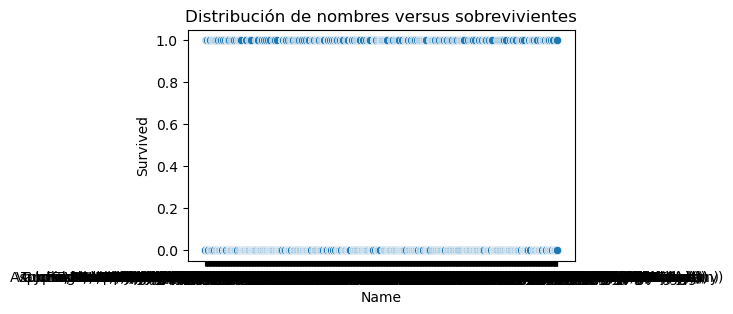

In [405]:
# Grafica antes del agrupamiento

plt.figure(figsize=(5, 3))
sns.scatterplot(x=Datos1['Name'], y=Datos1['Survived'])
plt.title('Distribución de nombres versus sobrevivientes')
plt.xlabel('Name')
plt.ylabel('Survived')
plt.show()

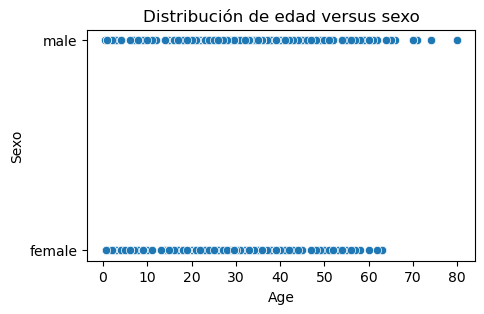

In [407]:
# Grafica antes del agrupamiento

plt.figure(figsize=(5, 3))
sns.scatterplot(x=Datos1['Age'], y=Datos1['Sex'])
plt.title('Distribución de edad versus sexo')
plt.xlabel('Age')
plt.ylabel('Sexo')
plt.show()

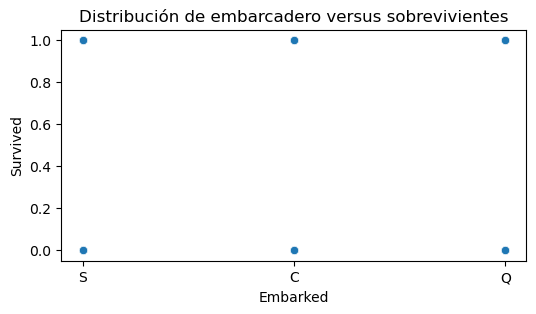

In [408]:
# Grafica antes del agrupamiento

plt.figure(figsize=(6, 3))
sns.scatterplot(x=Datos1['Embarked'], y=Datos1['Survived'])
plt.title('Distribución de embarcadero versus sobrevivientes')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()

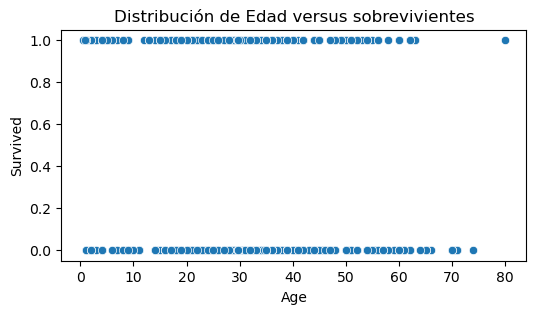

In [409]:
# Grafica antes del agrupamiento

plt.figure(figsize=(6, 3))
sns.scatterplot(x=Datos1['Age'], y=Datos1['Survived'])
plt.title('Distribución de Edad versus sobrevivientes')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

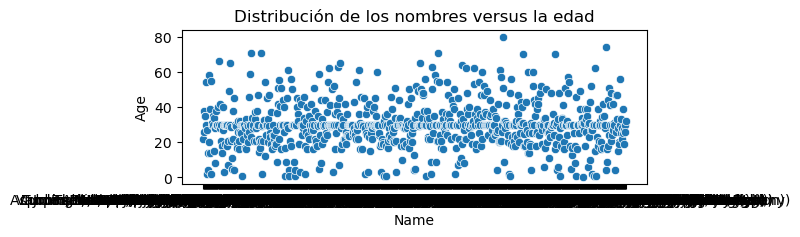

In [410]:
# Grafica antes del agrupamiento

plt.figure(figsize=(6, 2))
sns.scatterplot(x=Datos1['Name'], y=Datos1['Age'])
plt.title('Distribución de los nombres versus la edad')
plt.xlabel('Name')
plt.ylabel('Age')
plt.show()

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [412]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna sobreviventes
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna  sobrevientes

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [413]:
print (X_train)

     PassengerId  Pclass                                               Name  \
335          336       3                                 Denkoff, Mr. Mitto   
260          261       3                                  Smith, Mr. Thomas   
39            40       3                        Nicola-Yarred, Miss. Jamila   
690          691       1                            Dick, Mr. Albert Adrian   
684          685       2                  Brown, Mr. Thomas William Solomon   
..           ...     ...                                                ...   
520          521       1                              Perreault, Miss. Anne   
383          384       1  Holverson, Mrs. Alexander Oskar (Mary Aline To...   
555          556       1                                 Wright, Mr. George   
191          192       2                              Carbines, Mr. William   
421          422       3                                Charters, Mr. David   

        Sex        Age  SibSp  Parch      Ticket   

In [256]:
print (Y_train)

335    0
260    0
39     1
690    1
684    0
      ..
520    1
383    1
555    0
191    0
421    0
Name: Survived, Length: 617, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [421]:
scaler = StandardScaler()
scaled_Datos = scaler.fit_transform(Datos[['Age', 'Survived']])

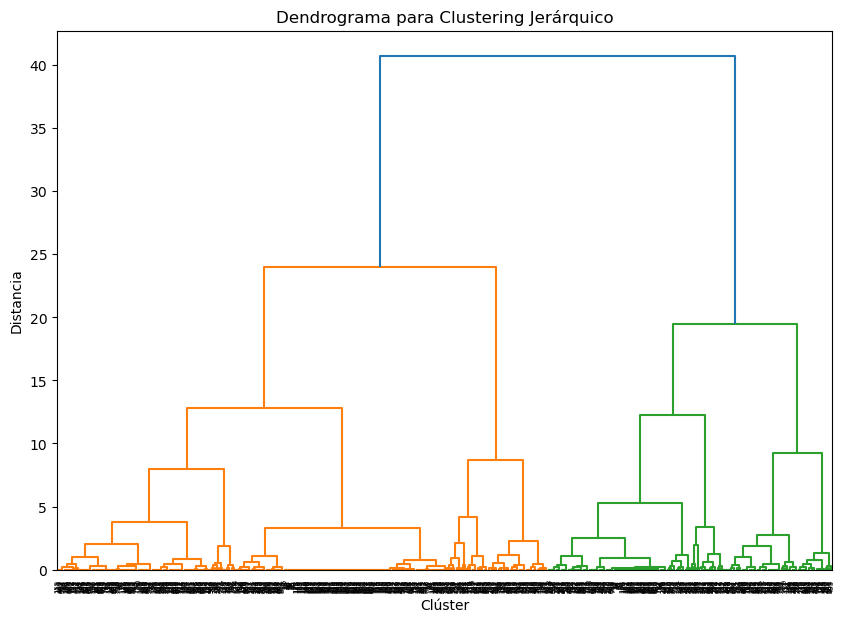

In [423]:
# Check for and handle non-finite values in scaled_data
scaled_Datos = np.nan_to_num(scaled_Datos)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_Datos, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Clúster')
plt.ylabel('Distancia')
plt.show()

## 6 Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [428]:
# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
Datos[[ 'Age', 'Survived']] = Datos[['Age', 'Survived']].fillna(Datos[['Age', 'Survived']].mean())
# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_Datos = scaler.fit_transform(Datos[['Age', 'Survived']])

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(scaled_Datos)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_Datos, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_Datos, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_Datos, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.5824888805718978
Índice de Calinski-Harabasz: 862.9159851447052
Índice de Davies-Bouldin: 0.580352464897413


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

Silhouette Score: 0.5824888805718978


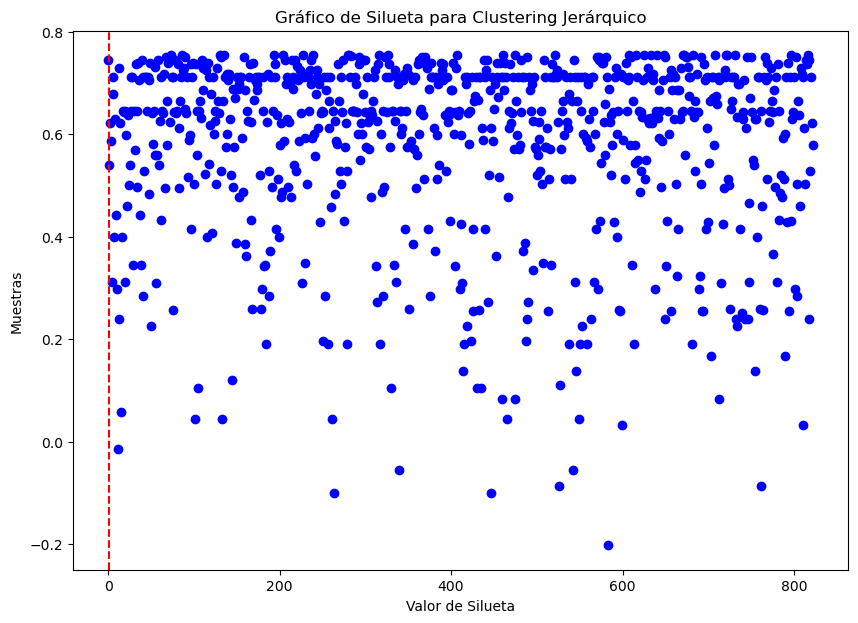

In [431]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_Datos, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_Datos, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

## Gráfico de Dispersión para Visualización de Clusters


In [434]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

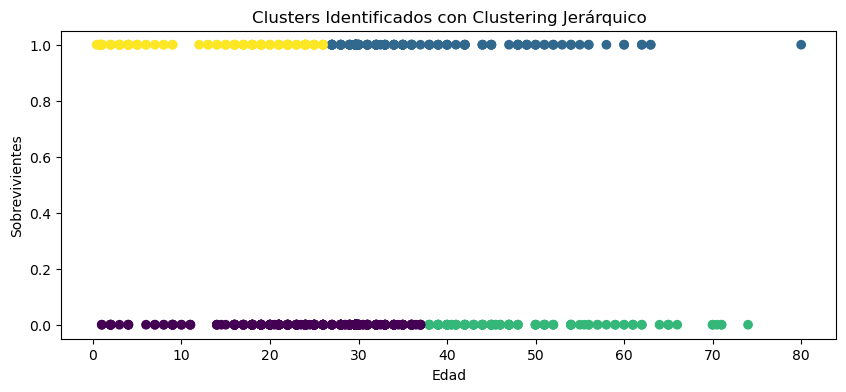

In [436]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Datos['Cluster'] = model.fit_predict(scaled_Datos)
# Graficar los clusters
plt.figure(figsize=(10, 4))
plt.scatter(Datos['Age'], Datos['Survived'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Sobrevivientes')
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

In [439]:
# Análisis

## 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/